In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Set a pleasant visual style for our plots
sns.set_style('whitegrid')

# Load the dataset
df = pd.read_csv("USA_Housing.csv")

In [3]:
# 1. See the first few rows of the data
print("First 5 rows of the dataset:")
print(df.head())


print("\n" + "="*50 + "\n")

First 5 rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

In [4]:
# 2. Get a concise summary of the dataframe
print("Dataframe information:")
df.info()

print("\n" + "="*50 + "\n")

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB




In [5]:
# 3. Get statistical summary for numerical columns
print("Statistical summary of the dataset:")
print(df.describe())

Statistical summary of the dataset:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min         

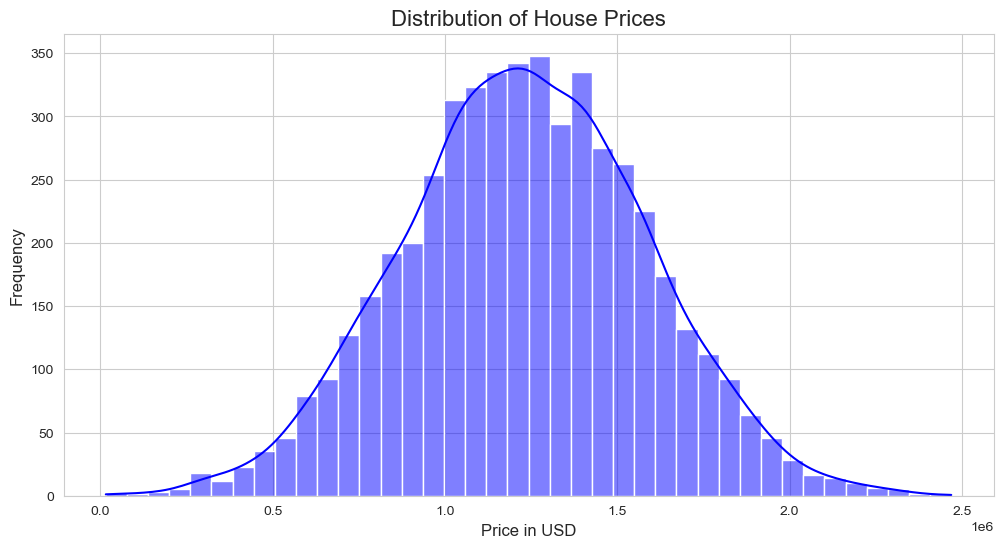

In [6]:
# Visualize the distribution of the 'Price' column
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, bins=40, color='blue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

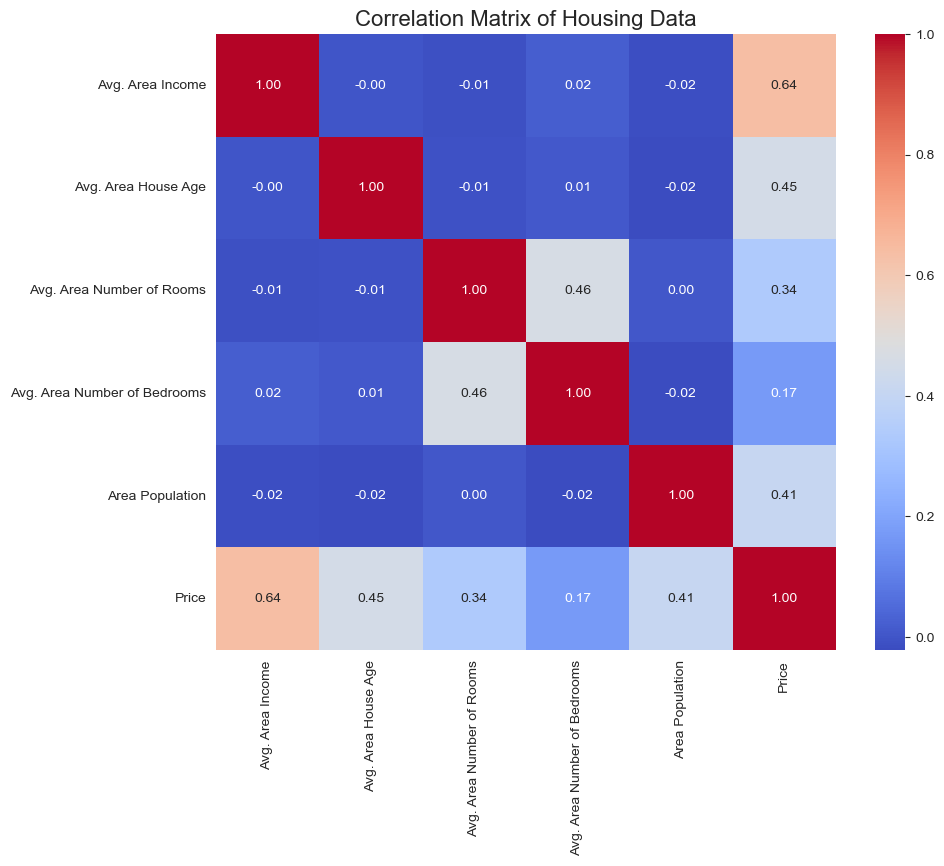

In [7]:
# Create a correlation matrix, using only the numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data', fontsize=16)
plt.show()

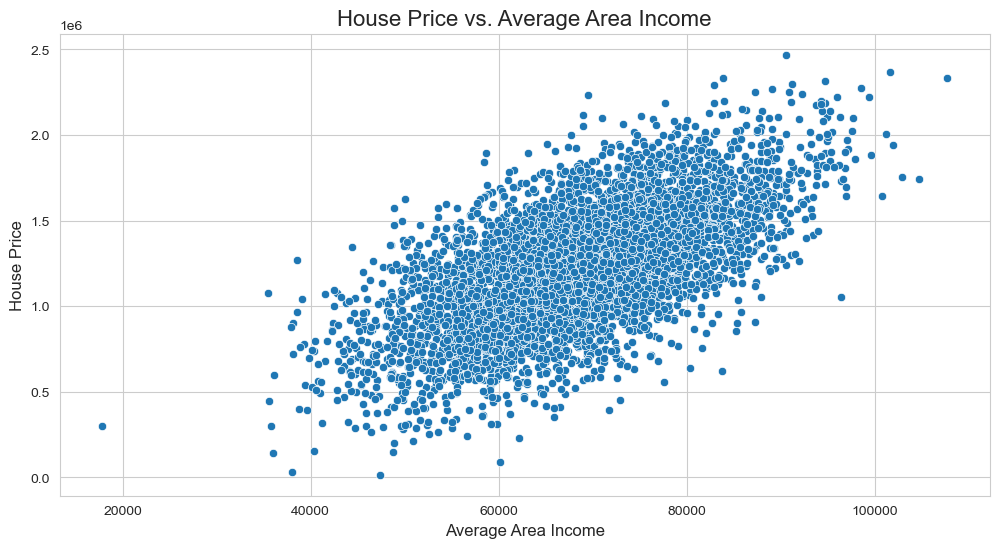

In [8]:
# Create a scatter plot of Average Area Income vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg. Area Income', y='Price', data=df)
plt.title('House Price vs. Average Area Income', fontsize=16)
plt.xlabel('Average Area Income', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.show()

In [9]:
# --- Step 1: Define X and y ---

# X will contain all the feature columns
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]

# y will contain the target variable
y = df['Price']

In [10]:
# --- Step 2: Split the data ---
from sklearn.model_selection import train_test_split

# Split the data into a training set (70%) and a testing set (30%)
# random_state=42 is used to ensure that we get the same split every time we run this code,
# which makes our results reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# --- Step 1: Create and train the model ---
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model using our training data
model.fit(X_train, y_train)

print("Training complete!")

Training complete!


In [12]:
# --- Step 2: View the model's coefficients ---

# Print the intercept of the model
print("Intercept:", model.intercept_)

print("\n" + "="*50 + "\n")

# Create a DataFrame to view the coefficients for each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)

Intercept: -2638673.426190995


Coefficients:
                                Coefficient
Avg. Area Income                  21.625799
Avg. Area House Age           165590.392746
Avg. Area Number of Rooms     119827.783390
Avg. Area Number of Bedrooms    2361.095262
Area Population                   15.216581


In [13]:
# Use the model to make predictions on the test data
predictions = model.predict(X_test)

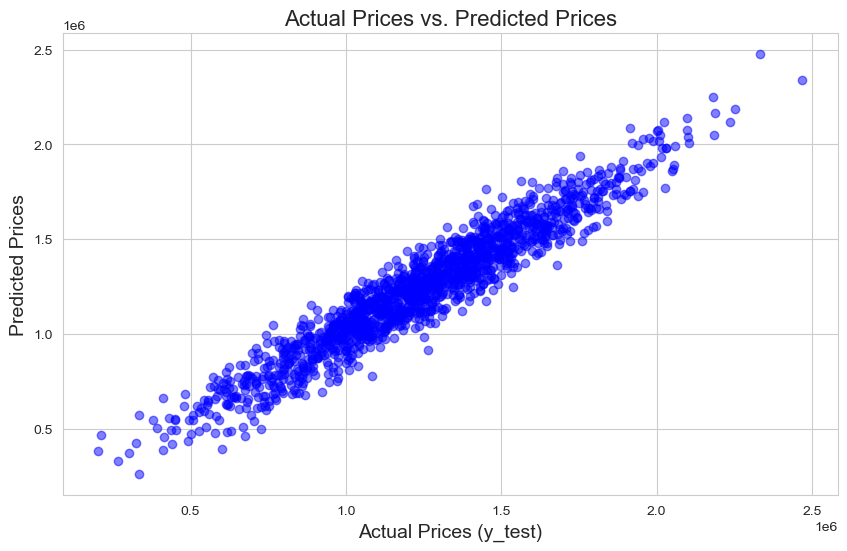

In [14]:
# Create a scatter plot to compare actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.xlabel("Actual Prices (y_test)", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.title("Actual Prices vs. Predicted Prices", fontsize=16)
plt.show()

In [15]:
# Import metrics from scikit-learn
from sklearn import metrics

# Calculate and print the model's performance metrics
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, predictions))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_test, predictions))
print('RMSE (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared (R²):', metrics.r2_score(y_test, predictions))

MAE (Mean Absolute Error): 81135.5660933688
MSE (Mean Squared Error): 10068422551.401016
RMSE (Root Mean Squared Error): 100341.52954485503
R-squared (R²): 0.9146818498754005


In [16]:
# --- Step 1: Define the features of a new house ---

# Let's create a dictionary for a new house we want to price
new_house = {
    'Avg. Area Income': 68000,
    'Avg. Area House Age': 5.5,
    'Avg. Area Number of Rooms': 6,
    'Avg. Area Number of Bedrooms': 3,
    'Area Population': 25000
}

# Convert this dictionary into a pandas DataFrame because the model expects it in this format
new_house_df = pd.DataFrame([new_house])

print("Features of the new house to be predicted:")
print(new_house_df)

Features of the new house to be predicted:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             68000                  5.5                          6   

   Avg. Area Number of Bedrooms  Area Population  
0                             3            25000  


In [17]:
# --- Step 2: Use the model to predict the price ---

# Use our trained model to predict the price of the new house
predicted_price = model.predict(new_house_df)

# Print the result in a user-friendly format
# The [0] is used to get the single price value from the array
# The :_ is for the comma separator and .2f is for two decimal places
print("\n" + "="*50 + "\n")
print(f"The predicted price for the new house is: ${predicted_price[0]:,.2f}")



The predicted price for the new house is: $849,092.58
